### Understanding vanishing and exploding gradient problem using different activation functions
- Difference in loss function behavior when we use RelU vs Sigmoid function
- Using gradient tape to analyze gardients 

In [ ]:
jupyter nbconvert --to markdown --TemplateExporter.exclude_input=True Vanishing_Gradients.ipynb
jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True Vanishing_Gradients.ipynb
jupyter nbconvert --to html --TemplateExporter.exclude_input=True Vanishing_Gradients.ipynb

In [276]:
import numpy as np
from sklearn.datasets import make_blobs
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils as ut
import pandas as pd
import random

plt.rcParams['axes.grid'] = True

In [277]:
tf.random.set_seed(42) # TF
np.random.seed(42) # Numpy
random.seed(42) # Python

In [278]:
trainX, trainy, testX, testy = ut.create_dataset(n_samples=10000, centers=3, n_features=3, cluster_std=2, random_state=42)
n_input, n_classes = trainX.shape[1], testy.shape[1]

In [279]:
def evaluate_model(n_layers, trainX, trainy, testX, testy, activation):
    model = tf.keras.Sequential()
    model.add(layers.Dense(10, activation=activation, name='layer-0', input_shape=(n_input,)))
    i=0
    for i in range(n_layers):
        model.add(layers.Dense(10, activation=activation, name='layer-'+str(i+1), input_shape=(n_input,)))            
    model.add(layers.Dense(n_classes, activation='softmax', name='layer-'+str(i+2)))
        
    model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainy, epochs=100, verbose=0)  
    loss_val, train_acc = model.evaluate(trainX, trainy, verbose=0)
    loss_val, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, train_acc, test_acc, model

### Explation of code:

**model.compile**:
- optimizer: the algorithm used to update weights during training. e.g., adam, sgd
- a loss function: to measure the error between the predicted value and the actual value, 
    - Categorical_crossentropy: true labels are one-hot encoded
- metrics: list of metrics to be evaluated by model during testing and training
- run_eagerly: 

**model.fit**:
Returns a history object. Its History.histoyr attribute is a record of training loss values and metrics values at succesive epochs, as well as validation loss values and validation metrics values (if applicable)

**model.evaluate**
returns scalar test loss or a list of scalars 

### Sigmoid activation function

# of layers=0: 0.958
# of layers=1: 0.946
# of layers=2: 0.758
# of layers=3: 0.360


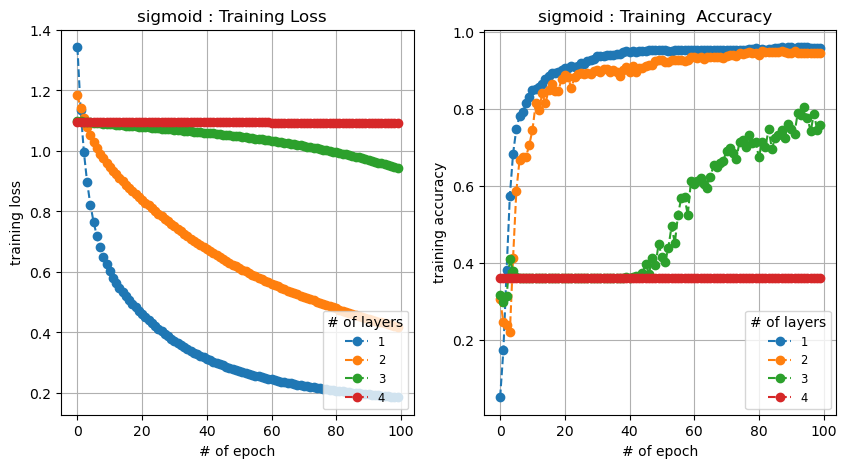

In [280]:
num_layers = [0,1,2,3]
plt.figure(figsize=(10,5))
activation = 'sigmoid'
for n_layers in num_layers:
  history, result, result_test, model = evaluate_model(n_layers, trainX, trainy, testX, testy, activation)
  #print(model.summary())
  # summarize final test set accuracy
  print('# of layers=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers+1), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')
  plt.title(activation + ' : Training Loss  ')
  plt.legend(title="# of layers", fontsize='small', loc='lower right')

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers+1), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')
  plt.title(activation + ' : Training  Accuracy  ')
  plt.legend(title="# of layers", fontsize='small', loc='lower right')


plt.show()

**Observation:**
- Loss function does not change/flattens for very deep layers with sigmoid function

#### Relu activation function

nodes=0: 0.962
nodes=1: 0.952
nodes=2: 0.952
nodes=3: 0.966


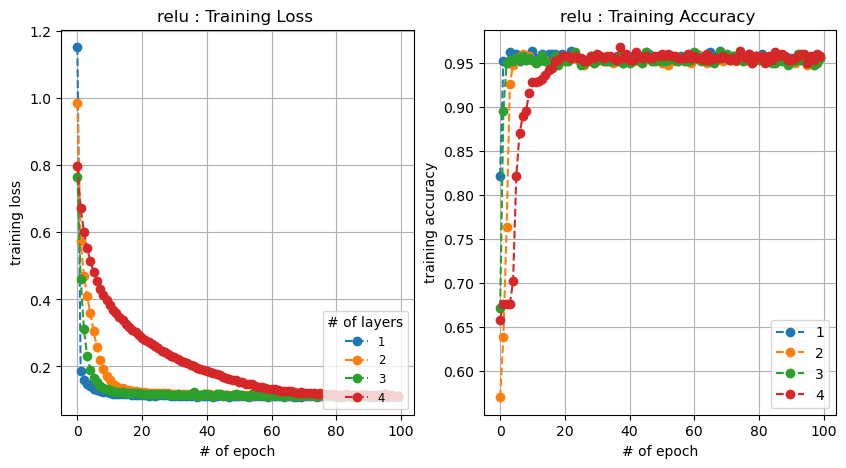

In [281]:
num_layers = [0,1,2,3]
plt.figure(figsize=(10,5))
activation = 'relu'
for n_layers in num_layers:
  history, result, result_test, model = evaluate_model(n_layers, trainX, trainy, testX, testy, activation)
  # summarize final test set accuracy
  print('nodes=%d: %.3f' % (n_layers, result))

  # plot learning curve 
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label=str(n_layers+1), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training loss')
  plt.title(activation + ' : Training Loss ')
  plt.legend(title="# of layers", fontsize='small', loc='lower right')
  #plt.grid()

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label=str(n_layers+1), marker = 'o', linestyle='--')
  plt.xlabel('# of epoch')
  plt.ylabel('training accuracy')
  plt.title(activation + ' : Training Accuracy ')
  plt.legend(title="# of layers", fontsize='small', loc='lower right')

  #plt.grid()

plt.legend()
plt.show()

### Plotting gradients during back propagation

[<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[ 4.51123267e-01,  2.45890021e-02,  1.33740735e+00,
         1.93095417e-03,  8.56981516e-01,  3.28843445e-01,
         1.04494981e-01,  1.80207063e-02,  1.47239923e-01,
        -2.14376479e-01],
       [-1.07758544e-01, -4.55712557e-01, -2.08320332e+00,
         5.15294001e-02, -2.66736478e-01, -1.88131645e-01,
        -6.19585156e-01, -1.05354404e+00, -1.04501152e+00,
         6.02276087e-01],
       [-2.18277425e-02, -2.19865888e-01, -8.65771294e-01,
         7.11031333e-02, -1.69307157e-01,  4.90383338e-03,
        -7.98408747e-01, -6.33390009e-01, -1.01433063e+00,
         2.44870573e-01]], dtype=float32)>, <tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.01305091, -0.01438677, -0.1221993 , -0.00928108,  0.00410407,
       -0.05264404,  0.07215443, -0.05856988,  0.09706742,  0.01365462],
      dtype=float32)>, <tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[-0.61849034, -0.02053102,  0.05292998,  0.33653483

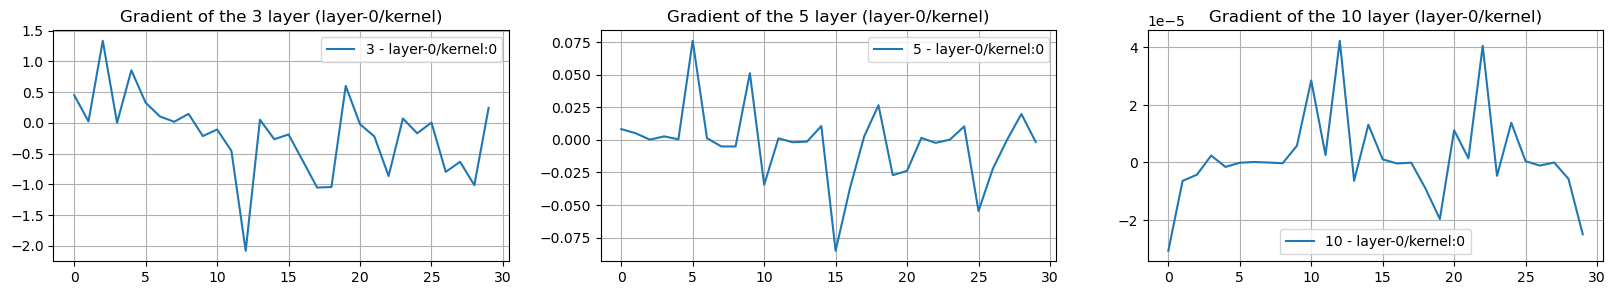

In [282]:
num_layers = [3, 5, 10]
#num_layers = [1]
activation = 'sigmoid'
fig, axs = plt.subplots(1,3, figsize=(20, 3), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

i = 0
for n_layers in num_layers:
  history, result, result_test, model = evaluate_model(n_layers, trainX, trainy, testX, testy, activation)
  with tf.GradientTape() as tape:
      pred = model(trainX)
      loss = tf.keras.losses.categorical_crossentropy(trainy, pred)
      grads = tape.gradient(loss, model.trainable_variables)
      print(grads)

  # plot weights
  for var, g in zip(model.trainable_variables, grads):
      #print(f'{var.name}, shape: {g.shape}')    
      if 'layer-0/kernel' in var.name:
          axs[i].plot(g.numpy().flatten(), label=str(n_layers) +' - ' + str(var.name)) 
          axs[i].set_title(f'Gradient of the {n_layers} layer (layer-0/kernel)')     
          axs[i].legend()
          i  = i + 1




**Observations:**
- Sigmoid function: Gradients of weights for layer-0 goes to 1e-5 when network is deep (10 layers).
- We do not see this behavior of weights in layer 9/10
- This does not happen for relu activation function even when network is deep.